<a href="https://colab.research.google.com/github/sidhanth123/ML_Lab/blob/main/iris_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# prompt: Create a code in which in it drop the row10-20
df_dropped = df.drop(df.index[10:21])
df_dropped.head(25)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# prompt: write a code in which values of 10th  row becomes zero
df.iloc[2] = np.nan
print(df.head(15))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 NaN               NaN                NaN               NaN   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 NaN               NaN                NaN               NaN   
10                0.0               0.0                0.0               0.0   
11                4.8               3.4 

In [ ]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,True,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
cols_with_missing = df.columns[df.isnull().any()].tolist()
for col in cols_with_missing:
  if df[col].dtype.name != 'category':
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nDataFrame after filling missing values with the mean and mode:")
print(df.head(15))
print("\nCheck for remaining null values:")
print(df.isnull().sum())


DataFrame after filling missing values with the mean and mode:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            5.100000          3.500000            1.40000          0.200000   
1            4.900000          3.000000            1.40000          0.200000   
2            5.820946          3.031081            3.77973          1.212162   
3            4.600000          3.100000            1.50000          0.200000   
4            5.000000          3.600000            1.40000          0.200000   
5            5.400000          3.900000            1.70000          0.400000   
6            4.600000          3.400000            1.40000          0.300000   
7            5.000000          3.400000            1.50000          0.200000   
8            4.400000          2.900000            1.40000          0.200000   
9            5.820946          3.031081            3.77973          1.212162   
10           0.000000          0.000000            0.000

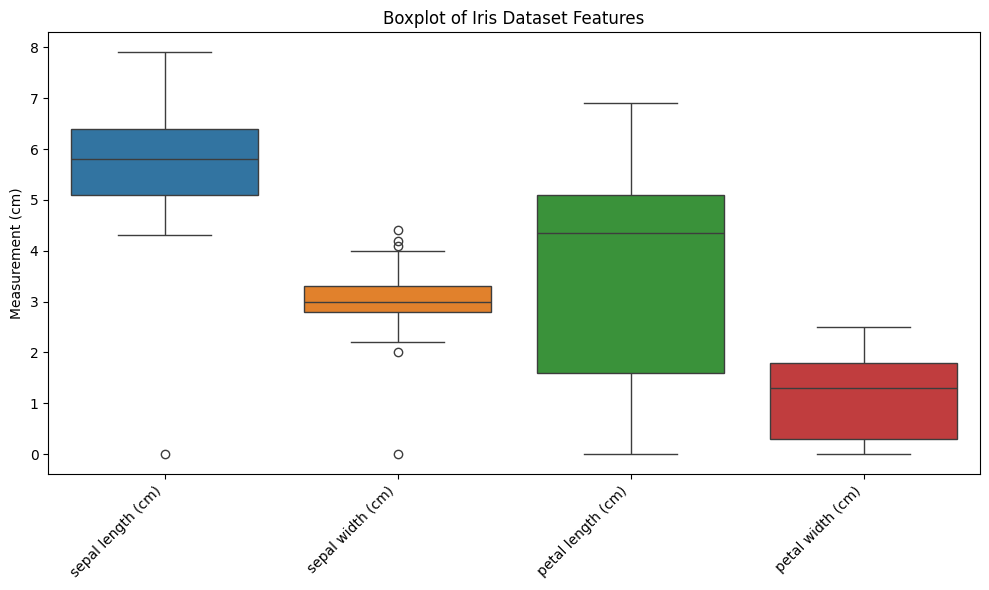

In [ ]:
# prompt: plot a boxplot in a give dataset.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Iris Dataset Features')
plt.ylabel('Measurement (cm)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_values = [0.100,120,130,140,150,100,200,220,250,300,400]

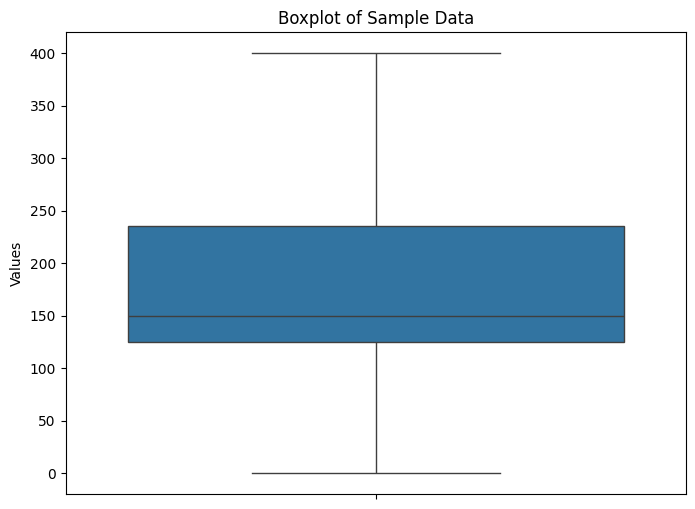

In [28]:
df_boxplot = pd.DataFrame({'Values': df_values})
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_boxplot['Values'])
plt.title('Boxplot of Sample Data')
plt.ylabel('Values')
plt.show()